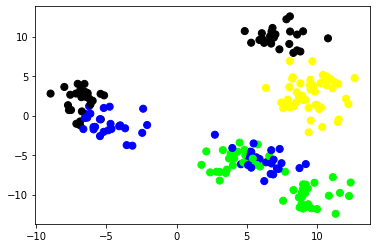

KNN  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.78


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors 

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8, 
                        cluster_std = 1.3, random_state = 4)
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') 

clf.fit(X_train, y_train)


predictions = clf.predict(X_test)
print('KNN ', clf)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


In [2]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[9 1 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 0 4 0 0 2 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 7 0 0 2 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 1 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7
           2       0.36      0.67      0.47         6
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       0.50      0.22      0.31         9
           6       1.00      1.00      1.00         8
           7       1.00      0.83      0.91         6

    accuracy                           0.78        50
   macro avg       0.78      0.83      0.78        50
weighted avg       0.81      0.78      0.77        50



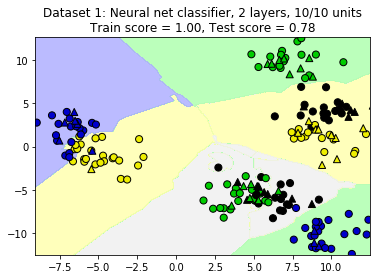

In [3]:
from adspy_shared_utilities import plot_class_regions_for_classifier
plot_class_regions_for_classifier(clf,X_train,y_train,X_test,y_test,
                                  'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

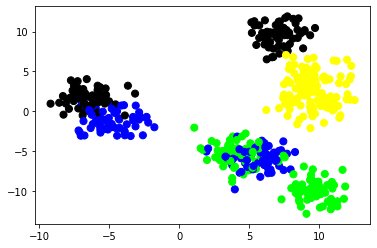

KNN n_neighbors= 1
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.82
[[13  2  0  0  0  0  0  0]
 [ 4 13  0  0  0  0  0  0]
 [ 0  0  9  0  0  5  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 10  0  0  1]
 [ 0  0  5  0  0  6  0  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  5  0  0 18]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.87      0.76      0.81        17
           2       0.64      0.64      0.64        14
           3       1.00      1.00      1.00        16
           4       0.67      0.91      0.77        11
           5       0.55      0.55      0.55        11
           6       1.00      1.00      1.00        18
           7       0.95      0.78      0.86        23

    accuracy                           0.82       125
   macro avg       0.80      0.81      0.80       125
weighted avg       0.83      0.82      0.83       125

KNN n_neighbors= 2


In [4]:
#%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.datasets import make_classification, make_blobs
#from sklearn.metrics import confusion_matrix, classification_report
#from matplotlib.colors import ListedColormap
#from sklearn.model_selection import train_test_split
#from matplotlib.colors import ListedColormap
#from sklearn import neighbors 

#cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_D2, y_D2 = make_blobs(n_samples = 500, n_features = 2, centers = 8, 
                        cluster_std = 1.3, random_state = 4)
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)


for n_neighbors in range (1, 20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance') 
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    print('KNN n_neighbors=', clf.n_neighbors)
    print('Accuracy of KNN classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test, predictions))

    #from adspy_shared_utilities import plot_class_regions_for_classifier
    #plot_class_regions_for_classifier(clf,X_train,y_train,X_test,y_test,
    #                                  'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

In [5]:
from sklearn.datasets import load_iris
cancer=load_iris()
(X_iris,y_iris)=load_iris(return_X_y=True)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = neighbors.KNeighborsClassifier(n_neighbors=9, weights='distance').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 0.97
